In [64]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
# Import headers
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
#Data preprocessing
dataset = pd.read_csv('/content/basket_analysis.csv', header = 0)
Data=dataset
rows = len(Data.axes[0])
cols = len(Data.axes[1])
Data.columns = range(Data.shape[1])
rows

998

In [69]:
# Intializing the list
transacts = []
# populating a list of transactions
for i in range(0, rows): 
  transacts.append([str(Data.values[i,j]) for j in range(0, cols)])

In [70]:
#Apriori algorithm
from apyori import apriori
ap = apriori(transactions = transacts, min_support = 0.2, use_colnames=True) # generate rules
# list of results coming from the apriori model
rslt = list(ap)

rslt

[RelationRecord(items=frozenset({'Apple'}), support=0.3837675350701403, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Apple'}), confidence=0.3837675350701403, lift=1.0)]),
 RelationRecord(items=frozenset({'Bread'}), support=0.3837675350701403, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.3837675350701403, lift=1.0)]),
 RelationRecord(items=frozenset({'Butter'}), support=0.42084168336673344, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Butter'}), confidence=0.42084168336673344, lift=1.0)]),
 RelationRecord(items=frozenset({'Cheese'}), support=0.40480961923847697, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cheese'}), confidence=0.40480961923847697, lift=1.0)]),
 RelationRecord(items=frozenset({'Chocolate'}), support=0.42084168336673344, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [97]:
%timeit -n 100 -r 10 ap

100 loops, best of 10: 46.5 ns per loop


In [72]:
#ECLAT algorithm
from pyECLAT import ECLAT

# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data=Data)

# DataFrame of binary values
eclat.df_bin


,Unicorn,Onion,Apple,Cheese,Bread,Chocolate,Eggs,Yogurt,Sugar,Milk,Dill,Ice cream,Butter,Nutmeg,Kidney Beans,Corn
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0
2,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,0,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
994,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1
995,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
996,0,0,0,1,0,1,1,1,1,0,0,1,1,1,1,1


In [73]:
items_total = eclat.df_bin.astype(int).sum(axis=0)

items_total

Unicorn         389
Onion           403
Apple           383
Cheese          404
Bread           383
Chocolate       420
Eggs            384
Yogurt          419
Sugar           408
Milk            405
Dill            397
Ice cream       409
Butter          420
Nutmeg          401
Kidney Beans    408
Corn            406
dtype: int64

In [74]:
# count items in each row
items_per_transaction = eclat.df_bin.astype(int).sum(axis=1)

items_per_transaction

0       1
1       7
2       6
3       2
4      10
       ..
993     4
994     6
995     5
996    10
997     2
Length: 998, dtype: int64

In [75]:
df = pd.DataFrame({'items': items_total.index, 'transactions': items_total.values}) 

# cloning pandas DataFrame for visualization purpose  
df_table = df.sort_values("transactions", ascending=False)

#  Top 5 most popular products/items
df_table.head(5)

,items,transactions
5,Chocolate,420
12,Butter,420
7,Yogurt,419
11,Ice cream,409
8,Sugar,408


In [76]:
eclat_indices, eclat_supports = eclat.fit(min_support=0.2)

Combination 1 by 1


16it [00:00, 128.27it/s]


Combination 2 by 2


120it [00:00, 215.63it/s]


Combination 3 by 3


560it [00:02, 208.45it/s]


In [88]:
len(eclat_supports)

22

In [87]:
print(eclat_supports)

{'Unicorn': 0.3897795591182365, 'Onion': 0.40380761523046094, 'Apple': 0.3837675350701403, 'Cheese': 0.40480961923847697, 'Bread': 0.3837675350701403, 'Chocolate': 0.42084168336673344, 'Eggs': 0.3847695390781563, 'Yogurt': 0.4198396793587174, 'Sugar': 0.4088176352705411, 'Milk': 0.405811623246493, 'Dill': 0.39779559118236474, 'Ice cream': 0.40981963927855714, 'Butter': 0.42084168336673344, 'Nutmeg': 0.40180360721442887, 'Kidney Beans': 0.4088176352705411, 'Corn': 0.40681362725450904, 'Cheese & Kidney Beans': 0.20040080160320642, 'Chocolate & Milk': 0.21142284569138275, 'Chocolate & Ice cream': 0.20140280561122245, 'Chocolate & Butter': 0.20240480961923848, 'Ice cream & Butter': 0.20741482965931865, 'Butter & Kidney Beans': 0.20240480961923848}


In [107]:
%timeit -n 100 -r 10 eclat_supports

100 loops, best of 10: 44.5 ns per loop


In [79]:
import pyfpgrowth

In [80]:
min_support= 0.2*rows
patterns = pyfpgrowth.find_frequent_patterns(transacts, min_support)
patterns

{('Apple',): 383,
 ('Apple', 'nan'): 3131,
 ('Bread',): 383,
 ('Bread', 'nan'): 3157,
 ('Butter',): 420,
 ('Butter', 'Chocolate'): 202,
 ('Butter', 'Chocolate', 'nan'): 1482,
 ('Butter', 'Ice cream'): 207,
 ('Butter', 'Ice cream', 'nan'): 1527,
 ('Butter', 'Kidney Beans'): 202,
 ('Butter', 'Kidney Beans', 'nan'): 1490,
 ('Butter', 'nan'): 3438,
 ('Cheese', 'Kidney Beans'): 200,
 ('Cheese', 'Kidney Beans', 'nan'): 1467,
 ('Cheese', 'nan'): 3355,
 ('Cheese', 'nan', 'nan'): 13628,
 ('Chocolate', 'Ice cream'): 201,
 ('Chocolate', 'Ice cream', 'nan'): 1475,
 ('Chocolate', 'Milk'): 211,
 ('Chocolate', 'Milk', 'nan'): 1570,
 ('Chocolate', 'nan'): 3419,
 ('Chocolate', 'nan', 'nan'): 13463,
 ('Corn',): 406,
 ('Corn', 'nan'): 3312,
 ('Dill',): 397,
 ('Dill', 'nan'): 3290,
 ('Eggs',): 384,
 ('Eggs', 'nan'): 3214,
 ('Ice cream', 'nan'): 3344,
 ('Ice cream', 'nan', 'nan'): 13253,
 ('Kidney Beans', 'nan'): 3329,
 ('Kidney Beans', 'nan', 'nan'): 13288,
 ('Milk', 'nan'): 3278,
 ('Milk', 'nan', 'nan'):

In [124]:
%timeit -n 100 -r 10 patterns

100 loops, best of 10: 43.1 ns per loop


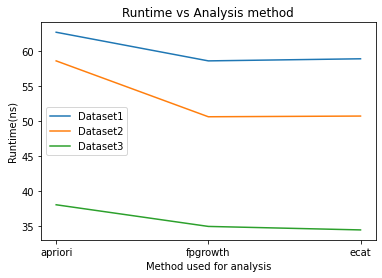

In [82]:
#Runtime of datasets using different methods
from matplotlib import pyplot as plt 
plt.title('Runtime vs Analysis method')
plt.xlabel('Method used for analysis')
plt.ylabel('Runtime(ns)')
plt.plot(['apriori','fpgrowth','ecat'],[62.7,58.6,58.9],label='Dataset1') 
plt.plot(['apriori','fpgrowth','ecat'],[58.6,50.6,50.7],label='Dataset2') 
plt.plot(['apriori','fpgrowth','ecat'],[38,34.9,34.4],label='Dataset3')     
plt.legend()
plt.show()

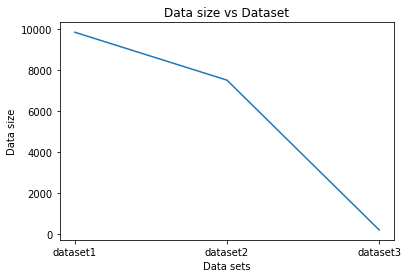

In [83]:
#Analysis of Datasize
from matplotlib import pyplot as plt 
plt.title('Data size vs Dataset')
plt.xlabel('Data sets')
plt.ylabel('Data size')
plt.plot(['dataset1','dataset2','dataset3'],[9835,7500,200,])    
plt.show()

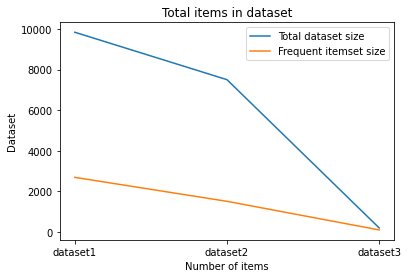

In [84]:
#Total number of items in a dataset
from matplotlib import pyplot as plt 
plt.title('Total items in dataset')
plt.xlabel('Number of items')
plt.ylabel('Dataset')
plt.plot(['dataset1','dataset2','dataset3'],[9835,7500,200,],label='Total dataset size')
plt.plot(['dataset1','dataset2','dataset3'],[2690,1510,102],label='Frequent itemset size')    
plt.legend()
plt.show()
